In [37]:
import pandas as pd


In [38]:
df = pd.read_csv('reg_eval.csv').sort_values('dice_score')
df.head()

,_ind,dice_score,mask_path,method,subject
20,_ind_type_201,0.360915,/home/hendrik/.scratch/hendrik/mlebe/preproces...,masked,sub-4009_ses-ofMpF_acq-TurboRARElowcov_T2w.nii.gz
46,_ind_type_95,0.360915,/home/hendrik/.scratch/hendrik/mlebe/preproces...,masked,sub-4007_ses-ofMaF_acq-TurboRARElowcov_T2w.nii.gz
0,_ind_type_286,0.375866,/home/hendrik/.scratch/hendrik/mlebe/preproces...,masked,sub-4013_ses-ofM_acq-TurboRARElowcov_T2w.nii.gz
85,_ind_type_215,0.408492,/home/hendrik/.scratch/hendrik/mlebe/preproces...,generic,sub-4011_ses-ofMaF_acq-TurboRARElowcov_T2w.nii.gz
64,_ind_type_16,0.425127,/home/hendrik/.scratch/hendrik/mlebe/preproces...,masked,sub-4001_ses-ofMaF_acq-TurboRARElowcov_T2w.nii.gz


In [39]:
df.groupby(['method'])['dice_score'].mean()

method
generic    0.524349
masked     0.491100
Name: dice_score, dtype: float64

In [40]:
subjects = list({subject for subject in df.subject})

In [41]:
df.loc[df.subject == subjects[0]]

,_ind,dice_score,mask_path,method,subject
28,_ind_type_169,0.478972,/home/hendrik/.scratch/hendrik/mlebe/preproces...,masked,sub-4009_ses-ofM_acq-TurboRARElowcov_T2w.nii.gz
29,_ind_type_166,0.514598,/home/hendrik/.scratch/hendrik/mlebe/preproces...,masked,sub-4009_ses-ofM_acq-TurboRARElowcov_T2w.nii.gz
96,_ind_type_169,0.520335,/home/hendrik/.scratch/hendrik/mlebe/preproces...,generic,sub-4009_ses-ofM_acq-TurboRARElowcov_T2w.nii.gz
97,_ind_type_166,0.529207,/home/hendrik/.scratch/hendrik/mlebe/preproces...,generic,sub-4009_ses-ofM_acq-TurboRARElowcov_T2w.nii.gz


In [42]:
df.loc[(df.subject == subjects[0])&(df.method == 'masked'), 'dice_score'].mean()

0.4967851302014601

In [43]:
masked_scores = [df.loc[(df.subject == subj)&(df.method == 'masked'), 'dice_score'].mean() for subj in subjects]

generic_scores = [df.loc[(df.subject == subj)&(df.method == 'generic'), 'dice_score'].mean() for subj in subjects]

scores_df = pd.DataFrame(data=list(zip(subjects, masked_scores, generic_scores)), columns=['subjects', 'masked_scores', 'generic_scores'])

In [44]:
worst_subj = scores_df.loc[scores_df.masked_scores == scores_df.masked_scores.min(), 'subjects'].item()

In [45]:
df.loc[df.subject == worst_subj]

,_ind,dice_score,mask_path,method,subject
20,_ind_type_201,0.360915,/home/hendrik/.scratch/hendrik/mlebe/preproces...,masked,sub-4009_ses-ofMpF_acq-TurboRARElowcov_T2w.nii.gz
21,_ind_type_198,0.458020,/home/hendrik/.scratch/hendrik/mlebe/preproces...,masked,sub-4009_ses-ofMpF_acq-TurboRARElowcov_T2w.nii.gz
88,_ind_type_201,0.537981,/home/hendrik/.scratch/hendrik/mlebe/preproces...,generic,sub-4009_ses-ofMpF_acq-TurboRARElowcov_T2w.nii.gz
90,_ind_type_198,0.551721,/home/hendrik/.scratch/hendrik/mlebe/preproces...,generic,sub-4009_ses-ofMpF_acq-TurboRARElowcov_T2w.nii.gz


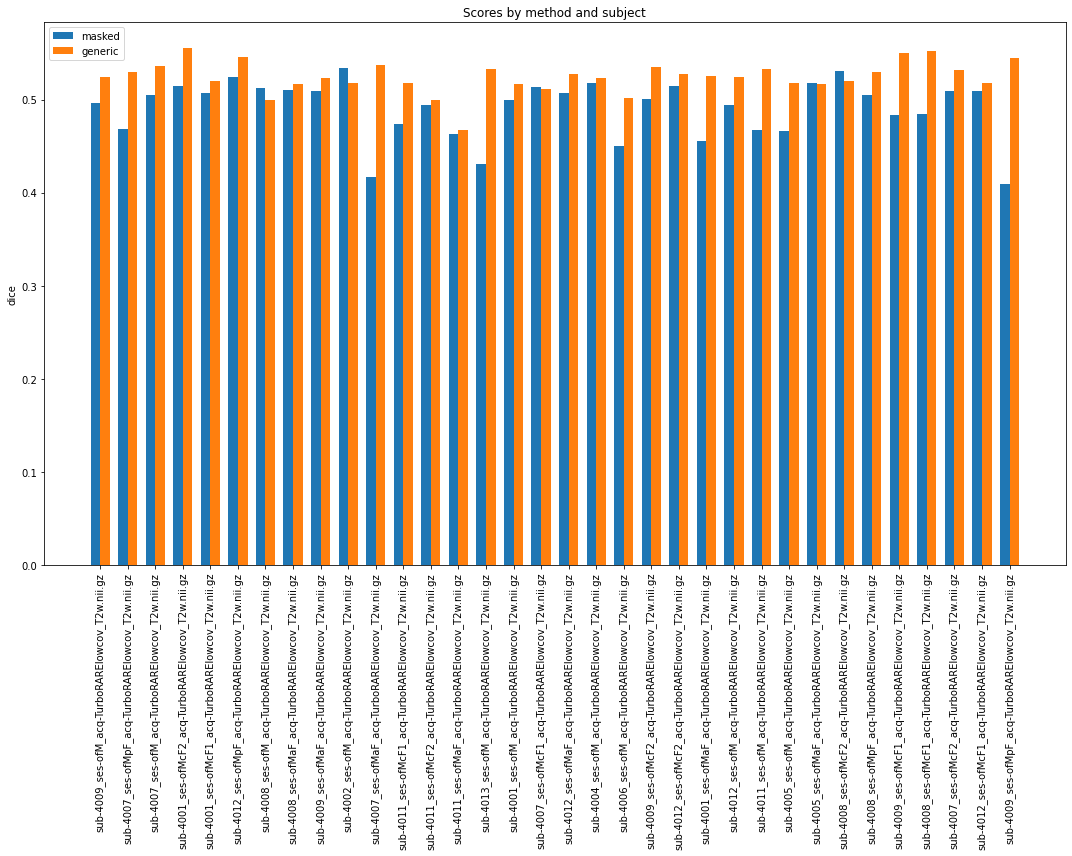

In [46]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(len(subjects))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(15,12))
rects1 = ax.bar(x - width/2, masked_scores, width, label='masked')
rects2 = ax.bar(x + width/2, generic_scores, width, label='generic')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('dice')
ax.set_title('Scores by method and subject')
ax.set_xticks(x)
ax.set_xticklabels(subjects, rotation=90)
ax.legend()

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

# Evaluate second run

In [47]:
results_df = pd.read_csv('results_df.csv')
results_df

,bias_correct,dice_score,method,model,old_scores,subject,uid
0,0.0,0.510531,masked,unet,"[0.4251271917485518, 0.4858729660211736]",sub-4001_ses-ofMaF_acq-TurboRARElowcov_T2w.nii.gz,unet_no_bias_correct
1,1.0,0.507707,masked,unet,"[0.4251271917485518, 0.4858729660211736]",sub-4001_ses-ofMaF_acq-TurboRARElowcov_T2w.nii.gz,unet_bias_correct
2,1.0,0.514106,generic,NaN,"[0.5274288086006702, 0.5240423019920118]",sub-4001_ses-ofMaF_acq-TurboRARElowcov_T2w.nii.gz,generic_bias_correct
3,0.0,0.506429,masked,unet,"[0.4473410676577105, 0.4999792955899607]",sub-4011_ses-ofMcF1_acq-TurboRARElowcov_T2w.ni...,unet_no_bias_correct
4,1.0,0.500186,masked,unet,"[0.4473410676577105, 0.4999792955899607]",sub-4011_ses-ofMcF1_acq-TurboRARElowcov_T2w.ni...,unet_bias_correct
...,...,...,...,...,...,...,...
97,1.0,0.503657,masked,unet,"[0.5279028601596224, 0.5067157958549615]",sub-4004_ses-ofM_acq-TurboRARElowcov_T2w.nii.gz,unet_bias_correct
98,1.0,0.526889,generic,NaN,"[0.5207094648883175, 0.5265875325858622]",sub-4004_ses-ofM_acq-TurboRARElowcov_T2w.nii.gz,generic_bias_correct
99,0.0,0.405071,masked,unet,"[0.3609154581666558, 0.4580202429882851]",sub-4009_ses-ofMpF_acq-TurboRARElowcov_T2w.nii.gz,unet_no_bias_correct
100,1.0,0.525810,masked,unet,"[0.3609154581666558, 0.4580202429882851]",sub-4009_ses-ofMpF_acq-TurboRARElowcov_T2w.nii.gz,unet_bias_correct


In [48]:
results_df['method'] = results_df.apply(lambda row : 'masked_biascorrect' if (row.method == 'masked' and row.bias_correct) else row.method, axis = 1)

In [49]:
results_df.groupby(['method'])['dice_score'].mean()

method
generic               0.506735
masked                0.495828
masked_biascorrect    0.491460
Name: dice_score, dtype: float64

In [50]:
results_df.loc[results_df['dice_score'] == results_df['dice_score'].min()]

,bias_correct,dice_score,method,model,old_scores,subject,uid
95,1.0,0.004368,generic,NaN,"[0.5865148721237874, 0.5237150694239734]",sub-4001_ses-ofMcF2_acq-TurboRARElowcov_T2w.ni...,generic_bias_correct


In [51]:
results_df.sort_values('dice_score')

,bias_correct,dice_score,method,model,old_scores,subject,uid
95,1.0,0.004368,generic,NaN,"[0.5865148721237874, 0.5237150694239734]",sub-4001_ses-ofMcF2_acq-TurboRARElowcov_T2w.ni...,generic_bias_correct
94,1.0,0.360915,masked_biascorrect,unet,"[0.5098630161059319, 0.5191347075254348]",sub-4001_ses-ofMcF2_acq-TurboRARElowcov_T2w.ni...,unet_bias_correct
82,1.0,0.380734,masked_biascorrect,unet,"[0.4826697381306353, 0.442931320593116]",sub-4011_ses-ofMaF_acq-TurboRARElowcov_T2w.nii.gz,unet_bias_correct
75,0.0,0.388666,masked,unet,"[0.3758661950919776, 0.4849519689330971]",sub-4013_ses-ofM_acq-TurboRARElowcov_T2w.nii.gz,unet_no_bias_correct
93,0.0,0.396299,masked,unet,"[0.5098630161059319, 0.5191347075254348]",sub-4001_ses-ofMcF2_acq-TurboRARElowcov_T2w.ni...,unet_no_bias_correct
...,...,...,...,...,...,...,...
15,0.0,0.541622,masked,unet,"[0.5043495818680487, 0.4977797112393397]",sub-4009_ses-ofMcF2_acq-TurboRARElowcov_T2w.ni...,unet_no_bias_correct
41,1.0,0.542239,generic,NaN,"[0.5258096492136527, 0.5387750937428258]",sub-4011_ses-ofM_acq-TurboRARElowcov_T2w.nii.gz,generic_bias_correct
101,1.0,0.544966,generic,NaN,"[0.5379805840984171, 0.5517205422314911]",sub-4009_ses-ofMpF_acq-TurboRARElowcov_T2w.nii.gz,generic_bias_correct
14,1.0,0.546831,generic,NaN,"[0.5483395366580405, 0.5429128473143744]",sub-4012_ses-ofMpF_acq-TurboRARElowcov_T2w.nii.gz,generic_bias_correct


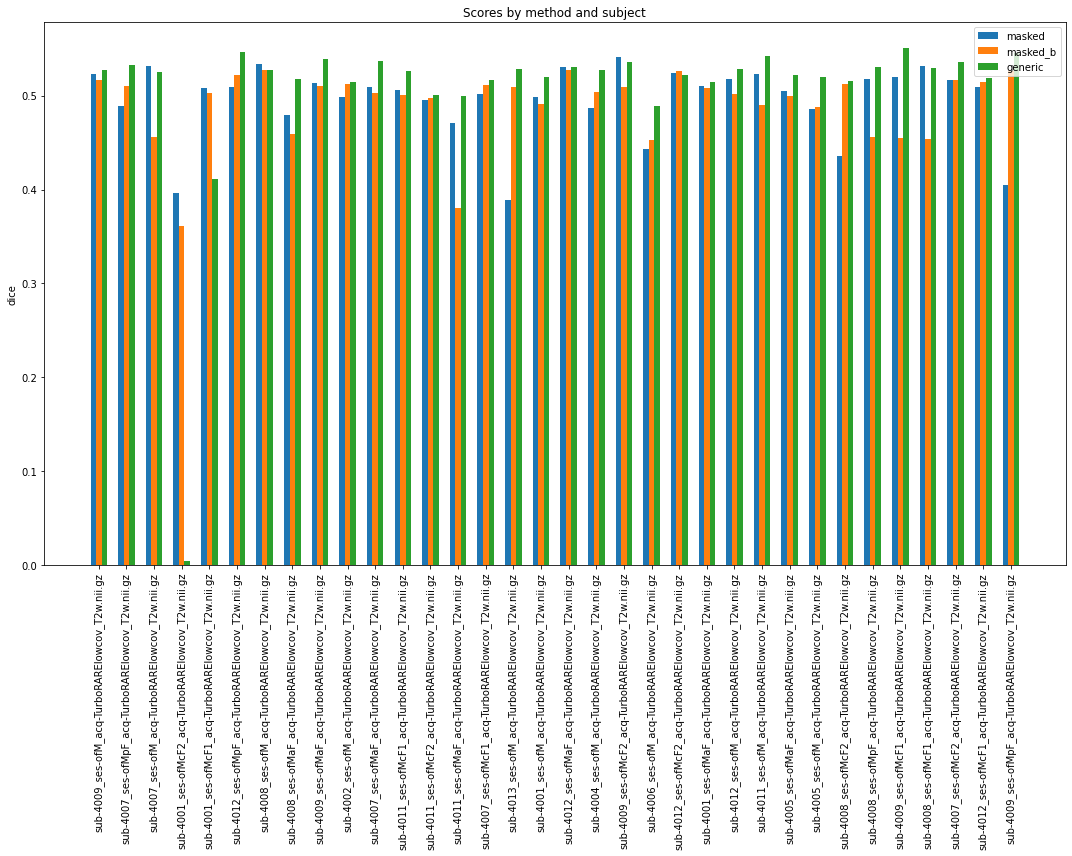

In [57]:
import matplotlib.pyplot as plt
import numpy as np

subjects = list({subject for subject in results_df.subject})

masked_scores = [results_df.loc[(results_df.subject == subj)&(results_df.method == 'masked'), 'dice_score'].mean() for subj in subjects]

masked_biascorrect_scores = [results_df.loc[(results_df.subject == subj)&(results_df.method == 'masked_biascorrect'), 'dice_score'].mean() for subj in subjects]

generic_scores = [results_df.loc[(results_df.subject == subj)&(results_df.method == 'generic'), 'dice_score'].mean() for subj in subjects]

x = np.arange(len(subjects))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(15,12))
rects1 = ax.bar(x - width, masked_scores, width, label='masked')
rects2 = ax.bar(x, masked_biascorrect_scores, width, label='masked_b')
rects3 = ax.bar(x + width, generic_scores, width, label='generic')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('dice')
ax.set_title('Scores by method and subject')
ax.set_xticks(x)
ax.set_xticklabels(subjects, rotation=90)
ax.legend()


fig.tight_layout()

plt.show()